### Olympics data analysis project

#### Required libraries

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # Suppress SettingWithCopyWarning
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # for ignoring the FutureWarning


#### Reading the datasets

##### df: Athletes dataset
##### region_df: Regions dataset

In [3]:
df=pd.read_csv("C:\\Users\\SRN\\OneDrive\\Desktop\\Python\\projects\\olympics_till_2016\\athlete_events.csv")
region_df=pd.read_csv("C:\\Users\SRN\\OneDrive\\Desktop\\Python\\projects\\olympics_till_2016\\noc_regions.csv")

In [4]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


##### df has these columns:
ID, Name, Sex, ,Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal

In [5]:
region_df.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


#### region_df has these columns:
NOC, region, notes

In [6]:
df.shape

(271116, 15)

#### taking the data of only summer olympics

In [7]:
df=df[df['Season']=='Summer']

In [8]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [9]:
df.shape

(222552, 15)

In [10]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [11]:
#group by noc: to count the medals

#merging adf and rdf with the common column NOC

#applying left join
df=df.merge(region_df,on='NOC',how='left')
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [12]:
#total countries participated till 2016 nunique
df['region'].nunique()

205

In [13]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [14]:
# checking the duplicate rows
df.duplicated().sum()

1385

In [15]:
#dropping the duplicate rows
df.drop_duplicates(inplace=True)

In [16]:
# creating a dummies for medal_details
#as medals are in categorical form
dummy_medals=pd.get_dummies(df['Medal'])
dummy_medals


# 000: nan
# 010:gold
# 001:silver
# 100:bronze


,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [17]:
# concatnating the athlete dataframe:df and medal dataframe: dummy_medals
df=pd.concat([df,dummy_medals],axis=1)
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [18]:
# groupy NOCs by medals
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In [19]:
# removing the duplicates
medal_tally=df.drop_duplicates(subset=['Team','NOC','Games','City','Sport','Event','Medal'])


In [20]:
medal_tally=medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()


In [21]:
medal_tally

,region,Gold,Silver,Bronze
0,USA,1035,802,708
1,Russia,592,498,487
2,Germany,444,457,491
3,UK,278,317,300
4,France,234,256,287
...,...,...,...,...
200,Lesotho,0,0,0
201,Albania,0,0,0
202,Libya,0,0,0
203,Liechtenstein,0,0,0


In [22]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [23]:
years=df['Year'].unique().tolist()
years

[1992,
 2012,
 1920,
 1900,
 1932,
 1952,
 2000,
 1996,
 1912,
 1924,
 1948,
 2008,
 2016,
 2004,
 1984,
 1968,
 1972,
 1988,
 1936,
 1956,
 1960,
 1928,
 1976,
 1980,
 1964,
 1906,
 1904,
 1908,
 1896]

In [24]:
years.sort()

In [25]:
years.insert(0,'Overall')

In [26]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [27]:
country=np.unique(df['region'].dropna().values).tolist()

In [28]:
country.sort()

In [29]:
country.insert(0,'Overall')


In [30]:
medal_df=df.drop_duplicates(subset=['Team','NOC','Games','City','Sport','Event','Medal'])

In [31]:
def fetch_medal_tally(df,year,country):

    medal_df=df.drop_duplicates(subset=['Team','NOC','Games','City','Sport','Event','Medal'])

    #for year wise medals flag variable is used here
    flag=0

    if year=='Overall' and country=='Overall':
        temp_df=medal_df
    if year== 'Overall' and country != 'Overall':
        flag=1
        temp_df=medal_df[medal_df['region']==country]
    if year != 'Overall' and country == 'Overall':
        temp_df=medal_df[medal_df['Year']==int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df=medal_df[(medal_df['Year']==year) & (medal_df['region']==country)]

    if flag==1:
        x=temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=True).reset_index()
    else:
        x=temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    print(x)

In [32]:
#country_wise yearly medals data
fetch_medal_tally(df,year='Overall',country='India')

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


####  Overall Analysis

No.of editions

No.of cities

No.of events/sports

No.of athletes

participating Nations

In [33]:
#No.of editions
df['Year'].unique().shape[0]-1

28

In [34]:
#No.of cities
df['City'].unique().shape[0]

23

In [35]:
#No.of sports
df['Sport'].unique().shape[0]

52

In [36]:
#No.of events
df['Event'].unique().shape[0]

651

In [37]:
#No.of participants
df['Name'].unique().shape[0]

116122

In [38]:
#No.of participating nations
df['region'].unique().shape[0]

206

#### line plot for participating nations by year


In [39]:
#dropping the records where we have same year and and region
#and checking for the values
year_vs_nation=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')
year_vs_nation.rename(columns={'index':'Edition','Year':'Total Nations'},inplace=True)

In [40]:
fig=px.line(year_vs_nation, x='Edition', y="Total Nations")
fig.show()

### insight from year_vs_nation line chart:

##### Q.Why there is sudden fall in the participating nations in 1980?

##### "1980 Moscow Olympics"

According to Historical events: 

On December 24,1979 Soviet Union(USSR) invaded Afganistan, and it was the era of cold war between USA and USSR.

In order to oppose this action, USA along with 64 other countries boycotted the Moscow Olymics, resulted only 80 countries participated in 1980's Olympics

#### Over the years how many events happend in Olympics

In [41]:
year_vs_event=df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('index')
year_vs_event.rename(columns={'index':'Edition','Year':'Total Events'},inplace=True)
fig=px.line(year_vs_event, x='Edition', y="Total Events")
fig.show()

#### Over the years how many athletes participated in Olympics

In [42]:
year_vs_athlete=df.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index().sort_values('index')
year_vs_athlete.rename(columns={'index':'Edition','Year':'Total Athletes'},inplace=True)
fig=px.line(year_vs_athlete, x='Edition', y="Total Athletes")
fig.show()

#### Heat map to check how many events happend in each sports over the year

In [43]:
x=df.drop_duplicates(['Year','Sport','Event'])

<AxesSubplot: xlabel='Year', ylabel='Sport'>

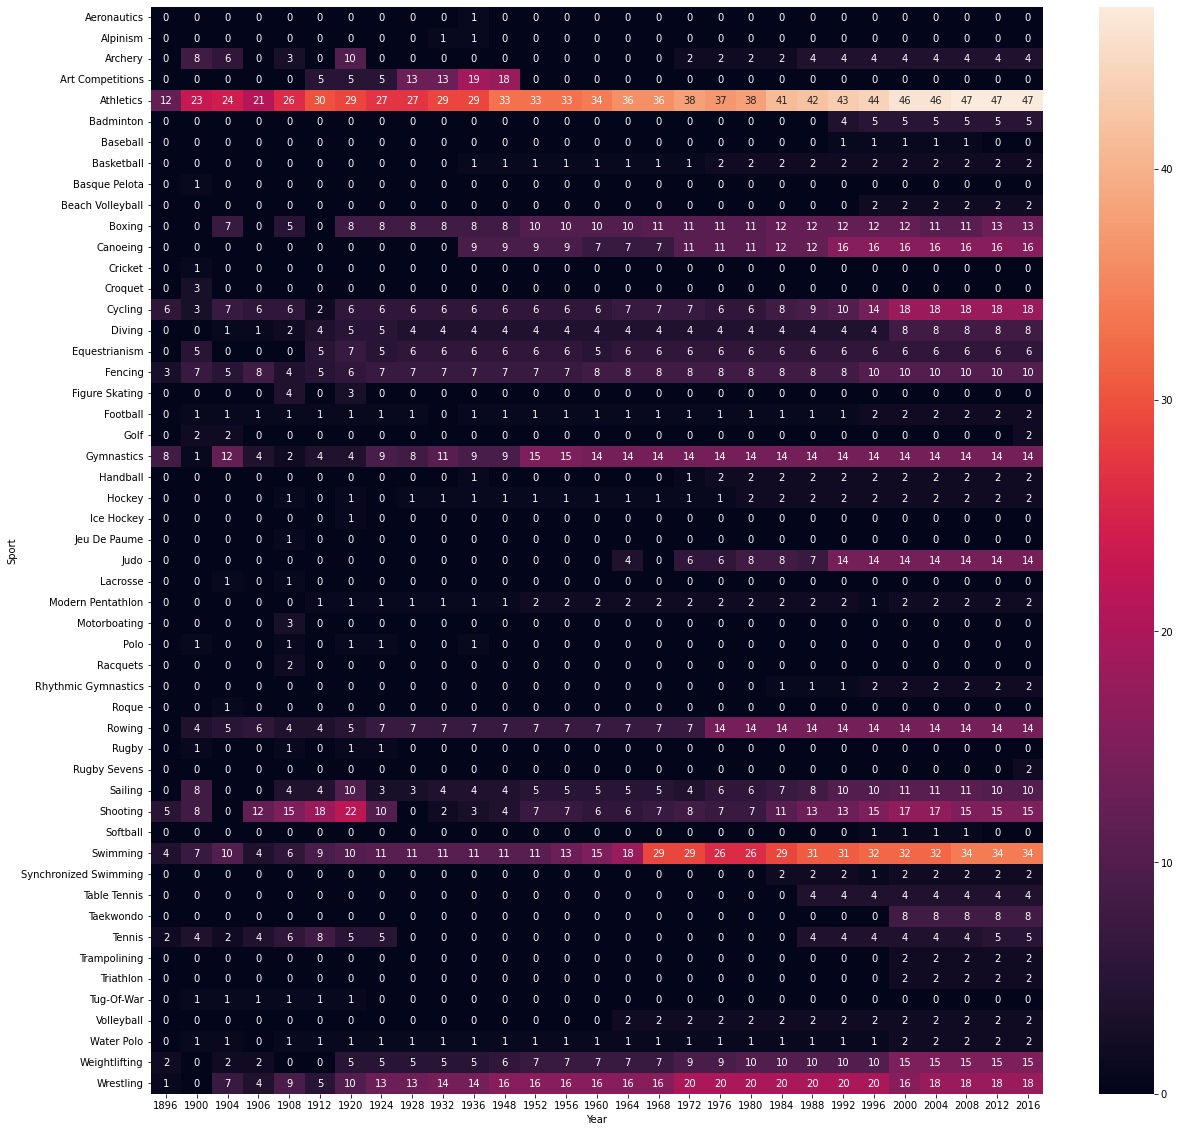

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

#### Insights from the heatmap:

Till Now:

Athletics is the most popular sport and having the highest no.of events over the years.

Swimming is the 2nd most popular sport and their is increase in no.of events from 1968 onwards.

Sports like Cricket, Ice Hockey, Jeu De Paume happened only once over the entire timeline

#### Most successfull athletes in Olympics

In [45]:
def most_successful(df,sport):
    temp_df=df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport']==sport]
    
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport','region']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    
    return x

In [46]:
most_successful(df,'Overall')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
195,Birgit Fischer-Schmidt,12,Canoeing,Germany


#### Country wise Analysis

Countrywise medal tally per year(line plot)

which country good in which sports

Most successful Athletes(Top 10)

In [47]:
temp_df=df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)


In [48]:
new_df=temp_df[temp_df['region']=='India']
final_df=new_df.groupby('Year').count()['Medal'].reset_index()

In [49]:
fig=px.line(final_df, x='Year', y="Medal")
fig.show()

<AxesSubplot: xlabel='Year', ylabel='Sport'>

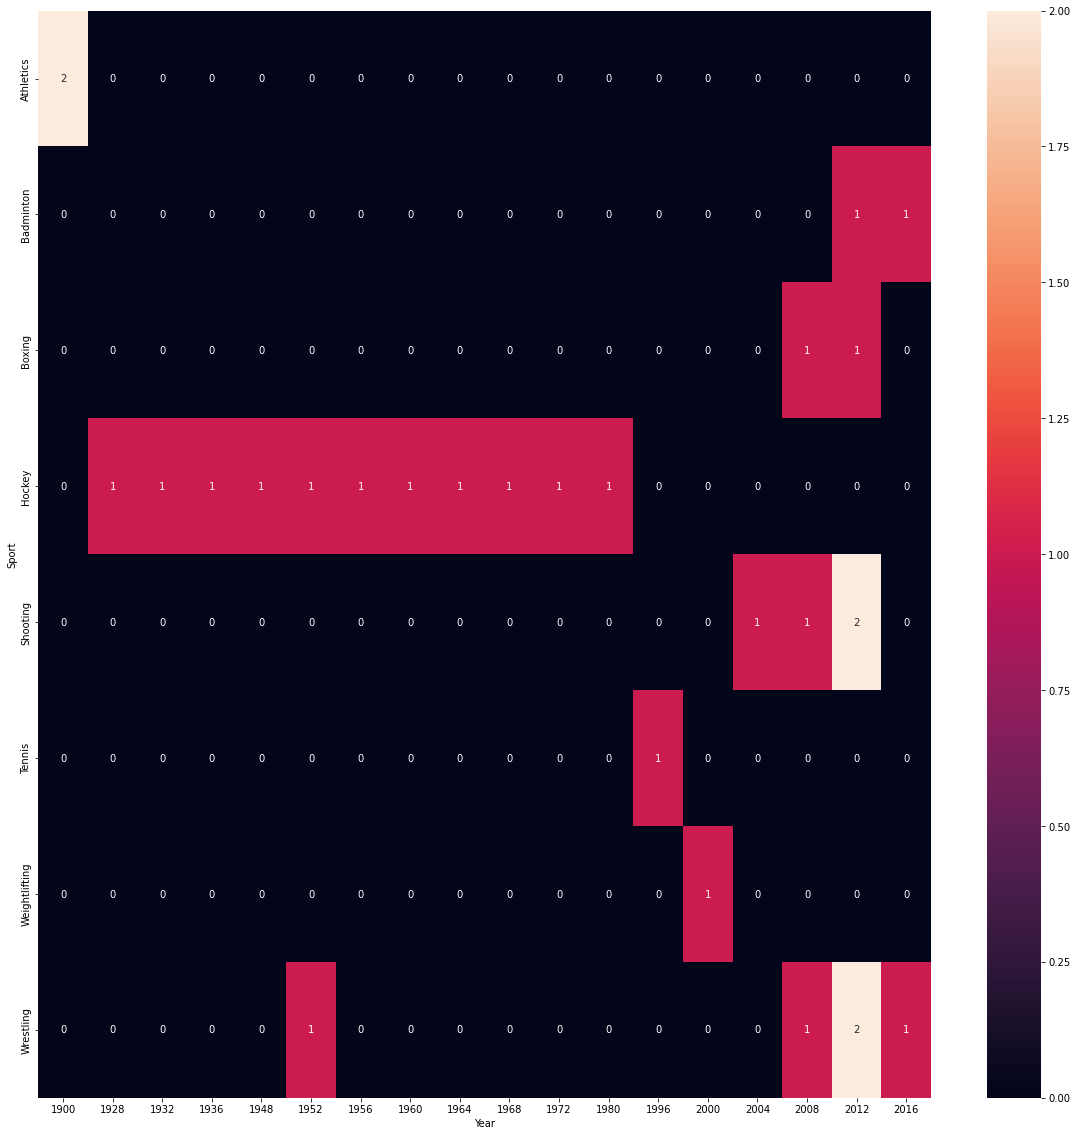

In [50]:
#country_event_heatmap
plt.figure(figsize=(20,20))
new_df=temp_df[temp_df['region']=='India']
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)


In [51]:
#most sucessfull athlete top(10) as per the country
def most_successful(df,country):
    temp_df=df.dropna(subset=['Medal'])

    temp_df = temp_df[temp_df['region']==country]
    
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    
    return x

In [52]:
most_successful(df,'India')

,Name,Medals,Sport
0,Udham Singh Kular,4,Hockey
4,Leslie Walter Claudius,4,Hockey
8,Shankar Pillay Laxman,3,Hockey
11,Ranganathan Francis,3,Hockey
14,Richard James Allen,3,Hockey
17,Balbir Singh,3,Hockey
20,Harbinder Singh Chimni,3,Hockey
23,"Balbir Singh Dosanjh, Sr.",3,Hockey
26,"Victor John ""V. J."" Peter",3,Hockey
29,Dhyan Chand Bais,3,Hockey


#### Athletewise Analysis

In [53]:
athlete_df=df.drop_duplicates(subset=['Name','region'])

In [54]:
x1=athlete_df['Age'].dropna()
x2=athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3=athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4=athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

In [55]:
fig=ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)

fig.update_layout(
    title="Distribution of Ages among Medalists",  # Title of the plot
    xaxis_title="Age",  # X-axis label
    yaxis_title="Density",  # Y-axis label
    legend_title="Medal Type",  # Legend title
    legend=dict(x=0.7, y=0.95),  # Adjust legend position
)

fig.update_layout(autosize=False,width=1000,height=600)

fig.show()

#### Distribution of age with respect to sports

In [56]:
all_sports=df['Sport'].unique().tolist()
print(all_sports)

['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics', 'Swimming', 'Badminton', 'Sailing', 'Gymnastics', 'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling', 'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery', 'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball', 'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo', 'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet', 'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota', 'Alpinism', 'Aeronautics']


In [57]:
all_sports=['Basketball', 'Judo', 'Football','Tug-Of-War', 'Athletics',
            'Swimming', 'Badminton', 'Sailing', 'Gymnastics', 'Art Competitions',
            'Handball', 'Weightlifting', 'Wrestling', 'Water Polo', 'Hockey',
            'Rowing', 'Fencing', 'Equestrianism', 'Shooting', 'Boxing',
            'Taekwondo', 'Cycling', 'Diving', 'Canoeing', 'Tennis',
            'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
            'Volleyball', 'Synchronized Swimming', 'Table Tennis',
            'Baseball', 'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
            'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
            'Ice Hockey' ]

#excluding the games like
'''['Cricket','Racquets', 'Motorboating', 'Croquet', 'Figure Skating',
'Jeu De Paume', 'Roque', 'Basque Pelota', 'Alpinism', 'Aeronautics']'''

"['Cricket','Racquets', 'Motorboating', 'Croquet', 'Figure Skating',\n'Jeu De Paume', 'Roque', 'Basque Pelota', 'Alpinism', 'Aeronautics']"

In [58]:
x=[]
name=[]
for sport in all_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)

In [59]:
fig=ff.create_distplot(x,name,show_hist=False,show_rug=False)
fig.update_layout(autosize=False, width=1000, height=600)


#### Insights from the above graph

more the stiffer the curve: winning gold medal chances are only higher to that specific age only.

eg: for Rythmic Gymnastic: to win gold medal player must be in the age around 17-18

lower the stifness of the curve: winning gold medal is not associated to one specific age.

Game of Archery can even won at the age of 35-40

similarly for art competition gold medal can also be won almost equal in chances at the age of 45-50 as compared to 30-35

#### Multi information graph

In [60]:
athlete_df['Medal'].fillna('No Medal', inplace=True)

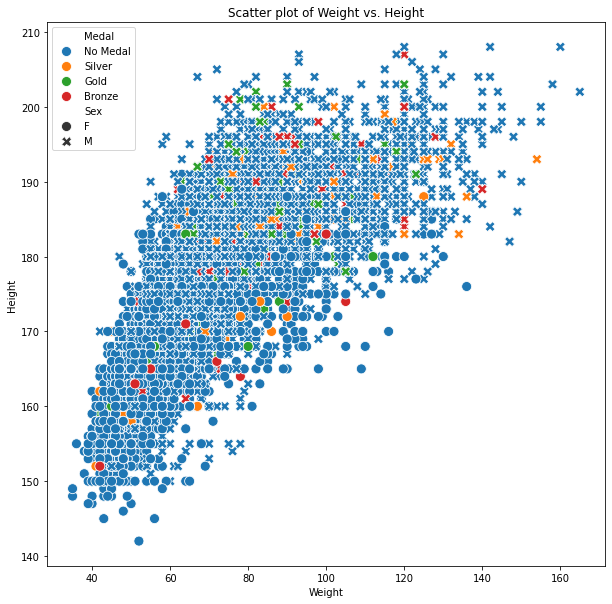

In [61]:
plt.figure(figsize=(10,10))
temp_df=athlete_df[athlete_df['Sport']=='Athletics']
sns.scatterplot(x='Weight', y='Height', data=temp_df,hue=temp_df['Medal'],style=temp_df['Sex'],s=100)
plt.title('Scatter plot of Weight vs. Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

<AxesSubplot: xlabel='Weight', ylabel='Height'>

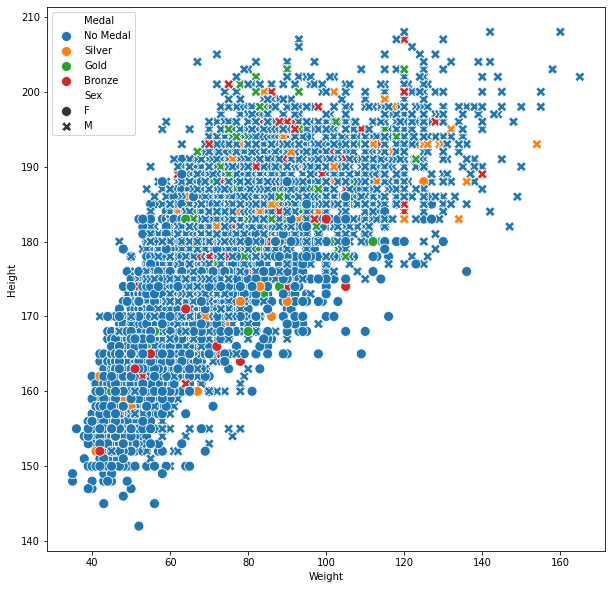

In [62]:
athlete_df['Medal'].fillna('No Medal', inplace=True)

plt.figure(figsize=(10,10))
temp_df=athlete_df[athlete_df['Sport']=='Athletics']

#with only sns
sns.scatterplot(x=temp_df['Weight'],y=temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],s=100)


##### Over the years participation of men vs women participations

In [63]:
men=athlete_df[athlete_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
women=athlete_df[athlete_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()

In [64]:
final=men.merge(women,on='Year',how='left')
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)

In [65]:
fig=px.line(final,x='Year',y=['Male','Female'])
fig.show()

In [66]:
final

,Year,Male,Female
0,1896,174,NaN
1,1900,1181,23.0
2,1904,629,6.0
3,1906,759,6.0
4,1908,1772,44.0
5,1912,1978,53.0
6,1920,2280,73.0
7,1924,2535,132.0
8,1928,2342,285.0
9,1932,1382,162.0
